In [353]:
import pandas as pd

***DATA JUMLAH PENDUDUK***

In [354]:
df = pd.read_csv('Jumlah_penduduk_menurut_kabupaten_kota_2018_2020.csv')
df.head()

,Wilayah Jawa Barat,2018,2019,2020
0,Provinsi Jawa Barat,48683861,49316712,49935858
1,Bogor,5840907,5965410,6088233
2,Sukabumi,2460693,2466272,2470219
3,Cianjur,2260620,2263072,2264328
4,Bandung,3717291,3775279,3831505


**DATA LUAS WILAYAH**

In [355]:
dd_2 = pd.read_csv('Luas_daerah_menurut_kabupaten_kota_jawabarat_2020.csv')
dd_2.head()

,Kabupaten/Kota,Ibu Kota Wilayah,Luas Wilayah (Km2),Persentase Terhadap Luas Wilayah,Jumlah Pulau
0,Bogor,Cibinong,2710.62,7.66,NaN
1,Sukabumi,Pelabuhan Ratu\t,4145.70,11.72,NaN
2,Cianjur,Cianjur,3840.16,10.85,NaN
3,Bandung,Soreang,1767.96,5.00,NaN
4,Garut,Torogong Kidul\t,3074.07,8.69,NaN


***GABUNGIN DATA PENDUDUK***

***Cleaning Data Luas Daerah***

In [356]:
dd_2.drop(["Jumlah Pulau"], axis=1, inplace=True)
dd_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kabupaten/Kota                    28 non-null     object 
 1   Ibu Kota Wilayah                  28 non-null     object 
 2   Luas Wilayah (Km2)                28 non-null     float64
 3   Persentase Terhadap Luas Wilayah  28 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [357]:
df_final = df.merge(dd_2, left_on="Wilayah Jawa Barat", right_on="Kabupaten/Kota")
df_final.drop(columns=["Kabupaten/Kota"], inplace=True)
df_final.head()

,Wilayah Jawa Barat,2018,2019,2020,Ibu Kota Wilayah,Luas Wilayah (Km2),Persentase Terhadap Luas Wilayah
0,Bogor,5840907,5965410,6088233,Cibinong,2710.62,7.66
1,Sukabumi,2460693,2466272,2470219,Pelabuhan Ratu\t,4145.70,11.72
2,Cianjur,2260620,2263072,2264328,Cianjur,3840.16,10.85
3,Bandung,3717291,3775279,3831505,Soreang,1767.96,5.00
4,Garut,2606399,2622425,2636637,Torogong Kidul\t,3074.07,8.69


In [358]:
kolom_baru = ["Wilayah Jawa Barat", "Luas Wilayah (Km2)"] + [str(t) for t in range(2018, 2021)] + ["Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah"]
df_final = df_final[kolom_baru]

In [359]:
df_final.head()

,Wilayah Jawa Barat,Luas Wilayah (Km2),2018,2019,2020,Ibu Kota Wilayah,Persentase Terhadap Luas Wilayah
0,Bogor,2710.62,5840907,5965410,6088233,Cibinong,7.66
1,Sukabumi,4145.70,2460693,2466272,2470219,Pelabuhan Ratu\t,11.72
2,Cianjur,3840.16,2260620,2263072,2264328,Cianjur,10.85
3,Bandung,1767.96,3717291,3775279,3831505,Soreang,5.00
4,Garut,3074.07,2606399,2622425,2636637,Torogong Kidul\t,8.69


***Hitung Kepadatan Penduduk per Tahun***

In [360]:
kepadatan_tahunan = {}

for tahun in range(2018, 2021):
    kolom_kepadatan = f'Kepadatan_{tahun}'
    df_final[kolom_kepadatan] = df_final[str(tahun)] / df_final["Luas Wilayah (Km2)"]
    kepadatan_tahunan[tahun] = df_final[["Wilayah Jawa Barat", kolom_kepadatan]]


In [361]:
df_final.head()

,Wilayah Jawa Barat,Luas Wilayah (Km2),2018,2019,2020,Ibu Kota Wilayah,Persentase Terhadap Luas Wilayah,Kepadatan_2018,Kepadatan_2019,Kepadatan_2020
0,Bogor,2710.62,5840907,5965410,6088233,Cibinong,7.66,2154.823251,2200.754809,2246.066583
1,Sukabumi,4145.70,2460693,2466272,2470219,Pelabuhan Ratu\t,11.72,593.553079,594.898811,595.850882
2,Cianjur,3840.16,2260620,2263072,2264328,Cianjur,10.85,588.678597,589.317112,589.644181
3,Bandung,1767.96,3717291,3775279,3831505,Soreang,5.00,2102.587728,2135.387113,2167.189869
4,Garut,3074.07,2606399,2622425,2636637,Torogong Kidul\t,8.69,847.865859,853.079143,857.702329


#### **Split Dataset**

In [362]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [363]:
X = df_final.drop(columns=["Wilayah Jawa Barat", "Kepadatan_2020", "Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah"])
y = df_final['Kepadatan_2020']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [365]:
knn_model = KNeighborsRegressor(n_neighbors=5)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(knn_model, X, y, cv=cv)

MAE: 4406.17
MSE: 30726319.60
RMSE: 5543.13


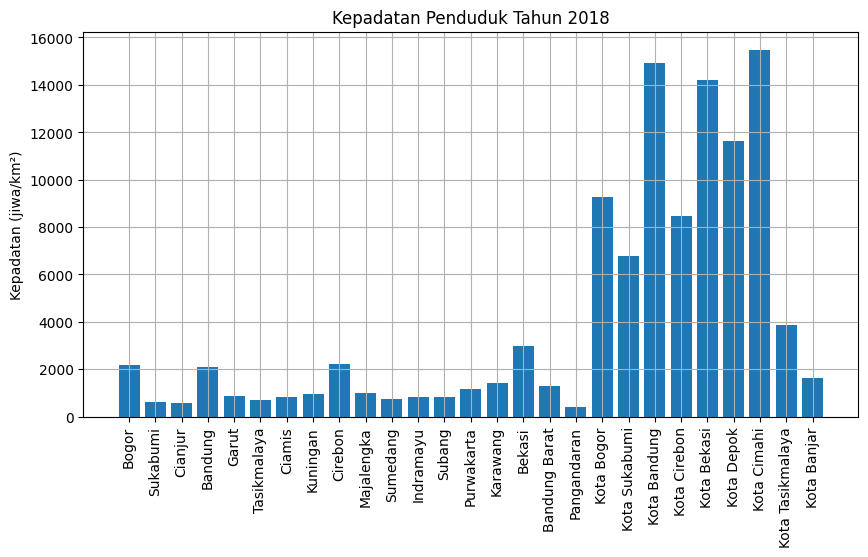

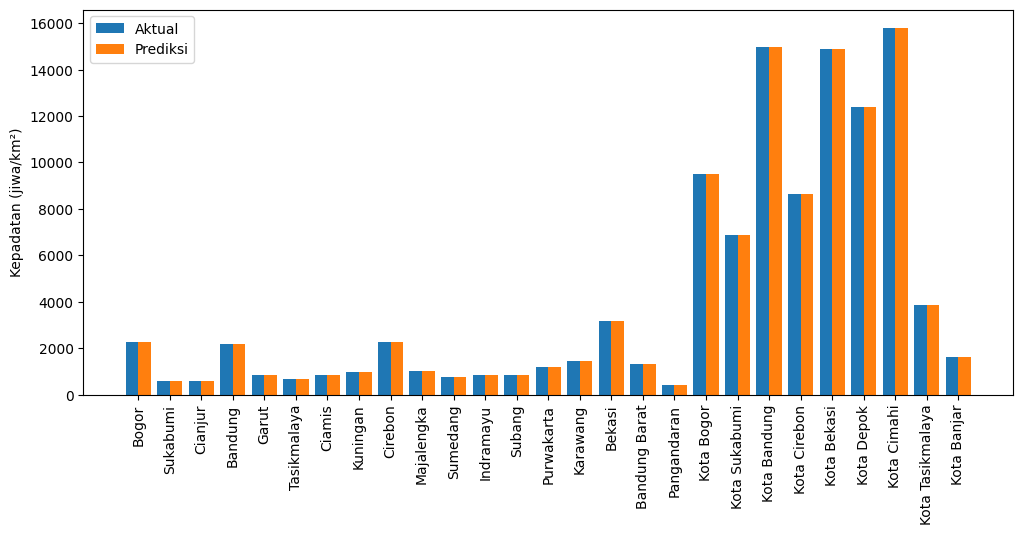

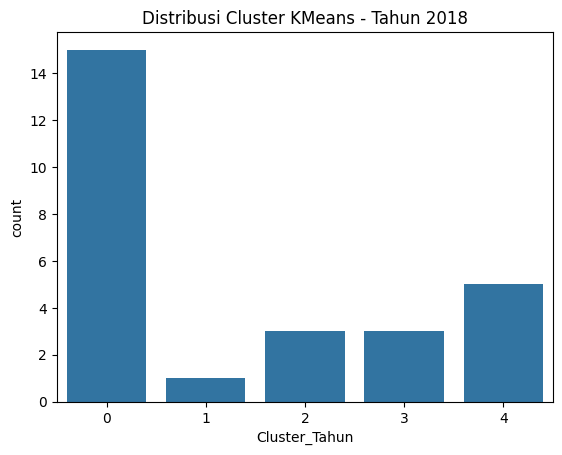

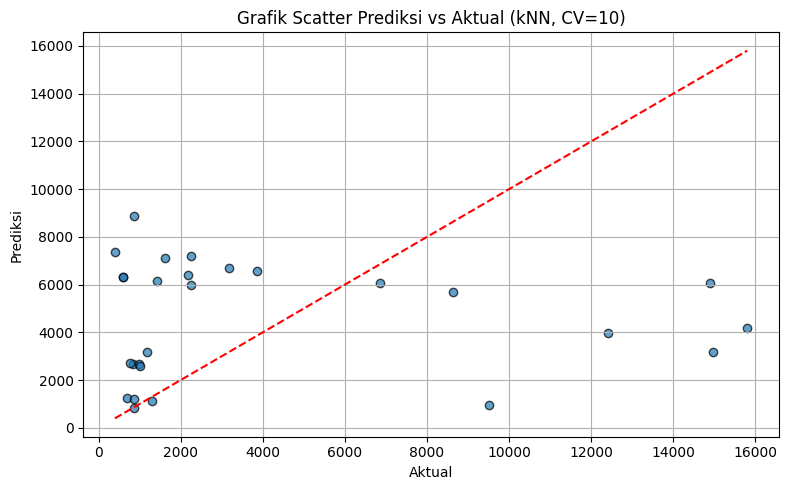

In [366]:
mse = mean_squared_error(y, y_pred_cv)
mae = mean_absolute_error(y, y_pred_cv)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred_cv, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # garis diagonal
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Grafik Scatter Prediksi vs Aktual (kNN, CV=10)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [367]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [368]:
X = df_final.drop(columns=["Wilayah Jawa Barat", "Ibu Kota Wilayah", "Persentase Terhadap Luas Wilayah", "Kepadatan_2020"])

In [369]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [370]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df_final['Cluster_Kepadatan'] = kmeans_labels


In [371]:
sil_score = silhouette_score(X_scaled, kmeans_labels)
db_score = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

Silhouette Score: 0.422
Davies-Bouldin Index: 0.654


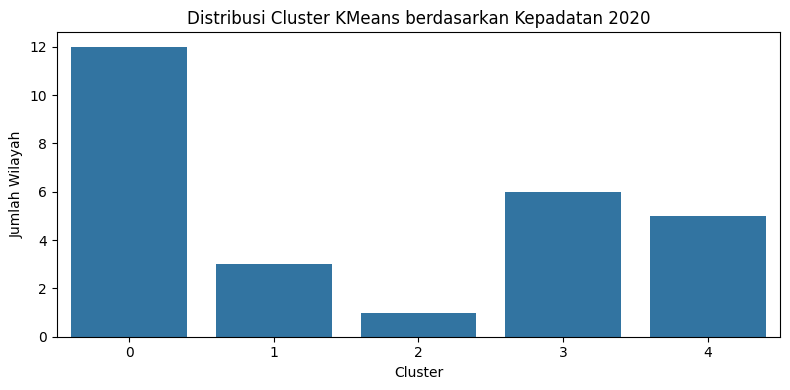

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster_Kepadatan', data=df_final)
plt.title("Distribusi Cluster KMeans berdasarkan Kepadatan 2020")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Wilayah")
plt.tight_layout()
plt.show()

In [373]:
# Hitung rata-rata kepadatan per klaster
mean_per_cluster = df_final.groupby("Cluster_Kepadatan")["Kepadatan_2020"].mean()

# Urutkan dari paling rendah ke paling tinggi
sorted_clusters = mean_per_cluster.sort_values().index.tolist()

# Label kategori
kategori_label = ["Sangat Rendah", "Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Buat mapping klaster → label
cluster_to_label = {cluster: label for cluster, label in zip(sorted_clusters, kategori_label)}

# Terapkan ke dataframe
df_final["Kategori_Kepadatan"] = df_final["Cluster_Kepadatan"].map(cluster_to_label)


In [374]:
batasan = df_final.groupby("Kategori_Kepadatan")["Kepadatan_2020"].agg(["min", "max"]).sort_values("min")
print(batasan)

                             min           max
Kategori_Kepadatan                            
Sangat Rendah         397.517822   2244.375940
Rendah                589.644181   3183.182842
Tinggi               1615.111464  15798.141075
Sedang               2246.066583   2246.066583
Sangat Tinggi       12402.945729  14970.495616


In [375]:
df_final_sorted = df_final.sort_values(by=["Kategori_Kepadatan", "Kepadatan_2020"])
print(df_final_sorted[["Wilayah Jawa Barat", "Kepadatan_2020", "Cluster_Kepadatan", "Kategori_Kepadatan"]])


   Wilayah Jawa Barat  Kepadatan_2020  Cluster_Kepadatan Kategori_Kepadatan
2             Cianjur      589.644181                  4             Rendah
1            Sukabumi      595.850882                  4             Rendah
4               Garut      857.702329                  4             Rendah
3             Bandung     2167.189869                  4             Rendah
15             Bekasi     3183.182842                  4             Rendah
17        Pangandaran      397.517822                  0      Sangat Rendah
5         Tasikmalaya      688.192569                  0      Sangat Rendah
10           Sumedang      760.327465                  0      Sangat Rendah
6              Ciamis      849.421436                  0      Sangat Rendah
12             Subang      851.435360                  0      Sangat Rendah
11          Indramayu      851.730544                  0      Sangat Rendah
7            Kuningan      978.880024                  0      Sangat Rendah
9          M

In [376]:
import joblib

joblib.dump(knn_model,'modelprediksi.pkl')

['modelprediksi.pkl']

In [377]:
!ngrok config add-authtoken 2wuW3knNk6fzW1KFL8hFeqO2Iud_4fX6ybBACVDTMFizyWVuo

Authtoken saved to configuration file: C:\Users\Asus\AppData\Local/ngrok/ngrok.yml


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Konfigurasi Halaman
# ---------------------------
st.set_page_config(page_title="Dashboard Prediksi Kepadatan Penduduk")

st.title("📊 Prediksi dan Analisis Kepadatan Penduduk Jawa Barat")
st.write("Aplikasi ini memprediksi dan menganalisis kepadatan penduduk berdasarkan data tahun sebelumnya dan luas wilayah.")

# ---------------------------
# Load Dataset
# ---------------------------
df = pd.read_csv("Jumlah_penduduk_menurut_kabupaten_kota_2018_2020.csv")
dd_2 = pd.read_csv("Luas_daerah_menurut_kabupaten_kota_jawabarat_2020.csv")
dd_2.drop(["Jumlah Pulau"], axis=1, inplace=True)

# Merge dan Preprocessing
df_final = df.merge(dd_2, left_on="Wilayah Jawa Barat", right_on="Kabupaten/Kota")
df_final.drop(columns=["Kabupaten/Kota"], inplace=True)
df_final["Kepadatan_2018"] = df_final["2018"] / df_final["Luas Wilayah (Km2)"]
df_final["Kepadatan_2019"] = df_final["2019"] / df_final["Luas Wilayah (Km2)"]
df_final["Kepadatan_2020"] = df_final["2020"] / df_final["Luas Wilayah (Km2)"]

def klasifikasi_kepadatan(nilai):
    if nilai < 1000:
        return "Sangat Rendah"
    elif nilai < 5000:
        return "Rendah"
    elif nilai < 10000:
        return "Sedang"
    elif nilai < 15000:
        return "Tinggi"
    else:
        return "Sangat Tinggi"

# ---------------------------
# Train Model Linear Regression
# ---------------------------
X = df_final[["Kepadatan_2018", "Kepadatan_2019"]]
y = df_final["Kepadatan_2020"]
model = LinearRegression()
model.fit(X, y)

# ---------------------------
# Visualisasi Bar Chart Tiap Tahun
# ---------------------------
st.subheader("📌 Visualisasi Kepadatan Penduduk per Tahun")
tahun_pilihan = st.selectbox("Pilih Tahun", [2018, 2019], key="tahun_bar_chart")

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(df_final["Wilayah Jawa Barat"], df_final[f"Kepadatan_{tahun_pilihan}"])
ax1.set_title(f"Kepadatan Penduduk Tahun {tahun_pilihan}")
ax1.set_ylabel("Kepadatan (jiwa/km²)")
ax1.set_xticks(np.arange(len(df_final)))
ax1.set_xticklabels(df_final["Wilayah Jawa Barat"], rotation=90)
ax1.grid(True)
st.pyplot(fig1)

# ---------------------------
# Kategori Kepadatan
# ---------------------------
st.subheader("📌 Kategori Kepadatan Penduduk")
data_kategori = {
    "Rentang Kepadatan (jiwa/km²)": [
        "< 1.000",
        "1.000 – < 5.000",
        "5.000 – < 10.000",
        "10.000 – < 15.000",
        "≥ 15.000"
    ],
    "Kategori": [
        "Sangat Rendah",
        "Rendah",
        "Sedang",
        "Tinggi",
        "Sangat Tinggi"
    ],
    "Contoh Nilai": [
        "800",
        "3.200",
        "7.500",
        "12.000",
        "15.700"
    ]
}
st.table(pd.DataFrame(data_kategori))


# ---------------------------
# Input dan Prediksi
# ---------------------------
st.subheader("📌 Prediksi Kepadatan Tahun 2020")
kepadatan_2018 = st.number_input("Masukkan Kepadatan 2018", min_value=0.0, step=10.0)
kepadatan_2019 = st.number_input("Masukkan Kepadatan 2019", min_value=0.0, step=10.0)

if st.button("Prediksi Sekarang"):
    prediksi = model.predict([[kepadatan_2018, kepadatan_2019]])[0]
    
    if prediksi < 1000:
        kategori = "Sangat Rendah"
    elif prediksi < 5000:
        kategori = "Rendah"
    elif prediksi < 10000:
        kategori = "Sedang"
    elif prediksi < 15000:
        kategori = "Tinggi"
    else:
        kategori = "Sangat Tinggi"

    st.success(f"Prediksi Kepadatan Tahun 2020: {prediksi:,.2f} jiwa/km²")
    st.info(f"Kategori Kepadatan: **{kategori}**")

# ---------------------------
# Tabel Prediksi vs Aktual
# ---------------------------
df_final["Prediksi_2020"] = model.predict(df_final[["Kepadatan_2018", "Kepadatan_2019"]])
df_final["Selisih_Error"] = df_final["Prediksi_2020"] - df_final["Kepadatan_2020"]

st.subheader("📌 Tabel Prediksi vs Aktual")
st.dataframe(df_final[["Wilayah Jawa Barat", "Kepadatan_2020", "Prediksi_2020", "Selisih_Error"]].round(2))

# ---------------------------
# Visualisasi Prediksi vs Aktual
# ---------------------------
st.subheader("📌 Visualisasi Perbandingan Prediksi vs Aktual")
fig2, ax2 = plt.subplots(figsize=(12, 5))
x = np.arange(len(df_final))
width = 0.4
ax2.bar(x - width/2, df_final["Kepadatan_2020"], width=width, label="Aktual")
ax2.bar(x + width/2, df_final["Prediksi_2020"], width=width, label="Prediksi")
ax2.set_xticks(x)
ax2.set_xticklabels(df_final["Wilayah Jawa Barat"], rotation=90)
ax2.set_ylabel("Kepadatan (jiwa/km²)")
ax2.legend()
st.pyplot(fig2)

# ---------------------------
# Clustering Berdasarkan Tahun
# ---------------------------
st.subheader("📌 Clustering Wilayah Berdasarkan Kepadatan")

tahun_klaster = st.selectbox("Pilih Tahun untuk Clustering", [2018, 2019, 2020], key="tahun_clustering")
X_cluster = df_final[[f"Kepadatan_{tahun_klaster}"]]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

kmeans = KMeans(n_clusters=5, random_state=42)
df_final["Cluster_Tahun"] = kmeans.fit_predict(X_cluster_scaled)

# Terapkan kategori berdasarkan nilai kepadatan, bukan cluster label
df_final[f"Kategori_{tahun_klaster}"] = df_final[f"Kepadatan_{tahun_klaster}"].apply(klasifikasi_kepadatan)

# Tampilkan hasil
st.write("📋 Hasil Cluster dan Kategori per Wilayah:")
st.dataframe(
    df_final[["Wilayah Jawa Barat", f"Kepadatan_{tahun_klaster}", f"Kategori_{tahun_klaster}"]]
    .sort_values(f"Kepadatan_{tahun_klaster}")
    .reset_index(drop=True)
)

# Visualisasi Cluster
fig3, ax3 = plt.subplots()
sns.countplot(x=f"Kategori_{tahun_klaster}", data=df_final, ax=ax3,
              order=["Sangat Rendah", "Rendah", "Sedang", "Tinggi", "Sangat Tinggi"])
ax3.set_title(f"Distribusi Kategori Kepadatan - Tahun {tahun_klaster}")
ax3.set_xlabel("Kategori Kepadatan")
st.pyplot(fig3)


2025-06-08 19:48:19.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 19:48:19.030 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [379]:
from pyngrok import ngrok
import threading
import time
import os

In [380]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://dc08-2404-8000-1024-76f0-481b-7b3f-86db-e9a6.ngrok-free.app" -> "http://localhost:8501"
